# Flipr Hackathon 5.0 Machine learning

# Stock Market Price Prediction

## Problem Statement 1: Prediction of Stock Price

## Data Preprocessing

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## Importing the data

In [1]:
raw_data = pd.read_excel('Train_dataset.xlsx',sheet_name = 0,)

NameError: name 'pd' is not defined

In [2]:
raw_data.head(10)

NameError: name 'raw_data' is not defined

In [4]:
get_ipython().run_line_magic('matplotlib', 'inline')

## Data Wrangling

### Detecting missing Values

In [5]:
missing_data = raw_data.isnull()
missing_data.head(10)

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Stock Index
False    7383
Name: Stock Index, dtype: int64

Index
False    7383
Name: Index, dtype: int64

Industry
False    7383
Name: Industry, dtype: int64

VWAP
False    7345
True       38
Name: VWAP, dtype: int64

General Index
False    7321
True       62
Name: General Index, dtype: int64

NAV
False    7322
True       61
Name: NAV, dtype: int64

P/E Ratio
False    7149
True      234
Name: P/E Ratio, dtype: int64

Volumes Traded
False    7115
True      268
Name: Volumes Traded, dtype: int64

Inventory Turnover
False    6984
True      399
Name: Inventory Turnover, dtype: int64

Covid Impact (Beta)
False    7007
True      376
Name: Covid Impact (Beta), dtype: int64

Tracking Error
False    7312
True       71
Name: Tracking Error, dtype: int64

Dollar Exchange Rate
False    7306
True       77
Name: Dollar Exchange Rate, dtype: int64

Put-Call Ratio
False    7298
True       85
Name: Put-Call Ratio, dtype: int64

P/B Ratio
False    7358
True       25
Name: P/B Ratio, dtype: int64

Stock 

In [7]:
# simply drop whole row with NaN in "price" column
raw_data.dropna(subset=["VWAP","General Index","NAV","Tracking Error","Dollar Exchange Rate","Put-Call Ratio","P/B Ratio"], axis=0, inplace=True)

In [8]:
len(raw_data)

7136

In [9]:
missing_data = raw_data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Stock Index
False    7136
Name: Stock Index, dtype: int64

Index
False    7136
Name: Index, dtype: int64

Industry
False    7136
Name: Industry, dtype: int64

VWAP
False    7136
Name: VWAP, dtype: int64

General Index
False    7136
Name: General Index, dtype: int64

NAV
False    7136
Name: NAV, dtype: int64

P/E Ratio
False    6965
True      171
Name: P/E Ratio, dtype: int64

Volumes Traded
False    6912
True      224
Name: Volumes Traded, dtype: int64

Inventory Turnover
False    6771
True      365
Name: Inventory Turnover, dtype: int64

Covid Impact (Beta)
False    6832
True      304
Name: Covid Impact (Beta), dtype: int64

Tracking Error
False    7136
Name: Tracking Error, dtype: int64

Dollar Exchange Rate
False    7136
Name: Dollar Exchange Rate, dtype: int64

Put-Call Ratio
False    7136
Name: Put-Call Ratio, dtype: int64

P/B Ratio
False    7136
Name: P/B Ratio, dtype: int64

Stock Price
False    7136
Name: Stock Price, dtype: int64



In [10]:
# simply drop whole row with NaN in "price" column
raw_data.dropna(subset=["P/E Ratio","Volumes Traded"], axis=0, inplace=True)

In [11]:
len(raw_data)

6896

In [12]:
raw_data.dropna(subset=["Inventory Turnover","Covid Impact (Beta)"], axis=0, inplace=True)

In [13]:
len(raw_data)

6592

#### Still we have enough data to train the model. But we are atleast sure that we're training the model on true data. Since we've strictly droped rows containing null values instead of replacing them by mean value

In [14]:
raw_data.reset_index(drop=True, inplace=True)

In [15]:
missing_data = raw_data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Stock Index
False    6592
Name: Stock Index, dtype: int64

Index
False    6592
Name: Index, dtype: int64

Industry
False    6592
Name: Industry, dtype: int64

VWAP
False    6592
Name: VWAP, dtype: int64

General Index
False    6592
Name: General Index, dtype: int64

NAV
False    6592
Name: NAV, dtype: int64

P/E Ratio
False    6592
Name: P/E Ratio, dtype: int64

Volumes Traded
False    6592
Name: Volumes Traded, dtype: int64

Inventory Turnover
False    6592
Name: Inventory Turnover, dtype: int64

Covid Impact (Beta)
False    6592
Name: Covid Impact (Beta), dtype: int64

Tracking Error
False    6592
Name: Tracking Error, dtype: int64

Dollar Exchange Rate
False    6592
Name: Dollar Exchange Rate, dtype: int64

Put-Call Ratio
False    6592
Name: Put-Call Ratio, dtype: int64

P/B Ratio
False    6592
Name: P/B Ratio, dtype: int64

Stock Price
False    6592
Name: Stock Price, dtype: int64



In [16]:
cleaned_data = raw_data.copy()

In [17]:
len(cleaned_data)

6592

In [18]:
cleaned_data.to_excel('cleaned_data.xlsx')

In [19]:
cleaned_data.dtypes

Stock Index              object
Index                    object
Industry                 object
VWAP                    float64
General Index           float64
NAV                     float64
P/E Ratio               float64
Volumes Traded          float64
Inventory Turnover      float64
Covid Impact (Beta)     float64
Tracking Error          float64
Dollar Exchange Rate    float64
Put-Call Ratio          float64
P/B Ratio               float64
Stock Price             float64
dtype: object

## Data normalization

In [20]:
# replace (original value) by (original value)/(maximum value)
print('Factor VWAP: ',cleaned_data['VWAP'].max())
cleaned_data['VWAP'] = cleaned_data['VWAP']/cleaned_data['VWAP'].max()

print('Factor General Index: ',cleaned_data['General Index'].max())
cleaned_data['General Index'] = cleaned_data['General Index']/cleaned_data['General Index'].max()

print('Factor NAV: ',cleaned_data['NAV'].max())
cleaned_data['NAV'] = cleaned_data['NAV']/cleaned_data['NAV'].max()

print('P/E Ratio: ',cleaned_data['P/E Ratio'].max())
cleaned_data['P/E Ratio'] = cleaned_data['P/E Ratio']/cleaned_data['P/E Ratio'].max()

print('Volumes Traded: ',cleaned_data['Volumes Traded'].max())
cleaned_data['Volumes Traded'] = cleaned_data['Volumes Traded']/cleaned_data['Volumes Traded'].max()

print('Inventory Turnover: ',cleaned_data['Inventory Turnover'].max())
cleaned_data['Inventory Turnover'] = cleaned_data['Inventory Turnover']/cleaned_data['Inventory Turnover'].max()

print('Covid Impact (Beta): ',cleaned_data['Covid Impact (Beta)'].max())
cleaned_data['Covid Impact (Beta)'] = cleaned_data['Covid Impact (Beta)']/cleaned_data['Covid Impact (Beta)'].max()

print('Tracking Error: ',cleaned_data['Tracking Error'].max())
cleaned_data['Tracking Error'] = cleaned_data['Tracking Error']/cleaned_data['Tracking Error'].max()

print('P/B Ratio: ',cleaned_data['P/B Ratio'].max())
cleaned_data['P/B Ratio'] = cleaned_data['P/B Ratio']/cleaned_data['P/B Ratio'].max()

print('Dollar Exchange Rate: ',cleaned_data['Dollar Exchange Rate'].max())
cleaned_data['Dollar Exchange Rate'] = cleaned_data['Dollar Exchange Rate']/cleaned_data['Dollar Exchange Rate'].max()

print('Put-Call Ratio: ',cleaned_data['Put-Call Ratio'].max())
cleaned_data['Put-Call Ratio'] = cleaned_data['Put-Call Ratio']/cleaned_data['Put-Call Ratio'].max()

Factor VWAP:  965.21
Factor General Index:  55722.0
Factor NAV:  99.98
P/E Ratio:  199.97
Volumes Traded:  20154452.0
Inventory Turnover:  8.33
Covid Impact (Beta):  0.78
Tracking Error:  0.061500000000000006
P/B Ratio:  9.56
Dollar Exchange Rate:  74.9
Put-Call Ratio:  1.29


In [21]:
cleaned_data

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,0.725531,0.229099,0.323865,0.226784,0.059967,0.606242,-0.551282,0.845528,0.013351,0.472868,0.962343,156.987852
1,AA4,BSE,Materials,0.857979,0.685225,0.736747,0.758914,0.412653,0.576230,0.038462,0.700813,1.000000,0.860465,0.585774,1121.787632
2,AA6,BSE,Materials,0.268967,0.685225,0.106321,0.765365,0.955812,0.965186,0.038462,0.559350,1.000000,0.891473,0.576360,158.687016
3,AA7,NYSE,Healthcare,0.658271,0.229099,0.672234,0.148172,0.351590,0.704682,1.000000,0.302439,0.013351,0.581395,0.899582,209.645870
4,AA9,NSE,Materials,0.985081,0.202257,0.315063,0.798020,0.067529,0.326531,0.038462,0.868293,1.000000,0.945736,0.675732,514.240811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6587,AC3205,S&P 500,Materials,0.741455,0.060143,0.417684,0.165675,0.548692,0.361345,0.038462,0.434146,0.013351,1.000000,0.654812,140.053671
6588,AC3206,NSE,Healthcare,0.825841,0.202257,0.150130,0.131620,0.855807,0.960384,1.000000,0.652033,1.000000,0.891473,0.808577,44.707999
6589,AC3207,NSE,Materials,0.634007,0.202257,0.103621,0.725559,0.623914,0.620648,0.038462,0.990244,1.000000,0.829457,0.550209,139.416425
6590,AC3208,JSE,Materials,0.345718,1.000000,0.513003,0.251038,0.936502,0.591837,0.038462,0.808130,0.236315,0.496124,0.140167,253.320730


### Visualising data distribution

In [25]:
normal_data = cleaned_data.copy()

(array([683., 638., 654., 659., 655., 650., 693., 641., 648., 671.]),
 array([0.00550139, 0.10495125, 0.20440111, 0.30385098, 0.40330084,
        0.5027507 , 0.60220056, 0.70165042, 0.80110028, 0.90055014,
        1.        ]),
 <a list of 10 Patch objects>)

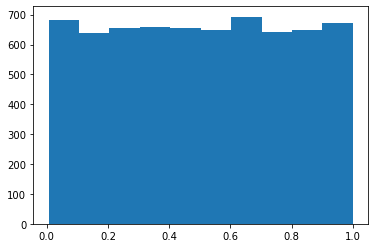

In [29]:
plt.hist(normal_data["VWAP"])

(array([1311., 2662.,    0.,    0.,    0.,    0., 1307.,    0.,    0.,
        1312.]),
 array([0.06014285, 0.15412857, 0.24811428, 0.3421    , 0.43608571,
        0.53007143, 0.62405714, 0.71804286, 0.81202857, 0.90601429,
        1.        ]),
 <a list of 10 Patch objects>)

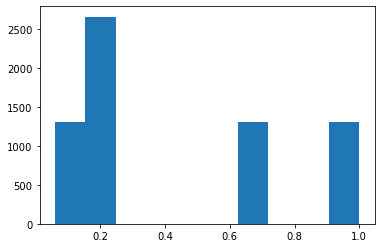

In [30]:
plt.hist(normal_data["General Index"])

(array([673., 640., 652., 690., 664., 675., 672., 640., 646., 640.]),
 array([0.10012002, 0.19010802, 0.28009602, 0.37008402, 0.46007201,
        0.55006001, 0.64004801, 0.73003601, 0.820024  , 0.910012  ,
        1.        ]),
 <a list of 10 Patch objects>)

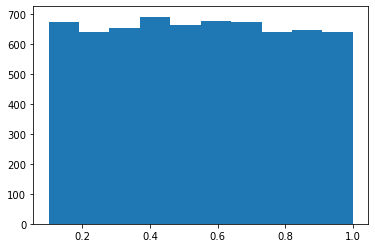

In [31]:
plt.hist(normal_data["NAV"])

(array([643., 676., 649., 667., 629., 614., 660., 681., 702., 671.]),
 array([0.05010752, 0.14509676, 0.24008601, 0.33507526, 0.43006451,
        0.52505376, 0.62004301, 0.71503225, 0.8100215 , 0.90501075,
        1.        ]),
 <a list of 10 Patch objects>)

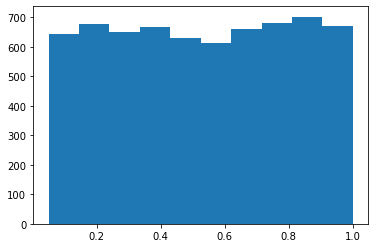

In [32]:
plt.hist(normal_data["P/E Ratio"])

(array([651., 656., 598., 715., 611., 674., 672., 654., 660., 701.]),
 array([0.02625311, 0.1236278 , 0.22100249, 0.31837718, 0.41575186,
        0.51312655, 0.61050124, 0.70787593, 0.80525062, 0.90262531,
        1.        ]),
 <a list of 10 Patch objects>)

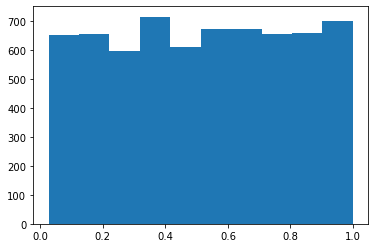

In [33]:
plt.hist(normal_data["Volumes Traded"])

(array([659., 660., 654., 681., 642., 654., 656., 709., 657., 620.]),
 array([0.30732293, 0.37659064, 0.44585834, 0.51512605, 0.58439376,
        0.65366146, 0.72292917, 0.79219688, 0.86146459, 0.93073229,
        1.        ]),
 <a list of 10 Patch objects>)

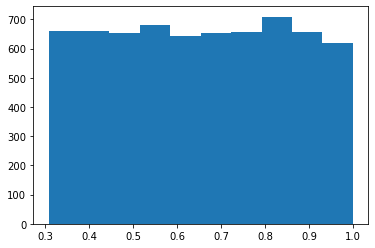

In [34]:
plt.hist(normal_data["Inventory Turnover"])

(array([1313.,    0.,    0., 1361., 1334., 1297.,    0.,    0.,    0.,
        1287.]),
 array([-0.55128205, -0.39615385, -0.24102564, -0.08589744,  0.06923077,
         0.22435897,  0.37948718,  0.53461538,  0.68974359,  0.84487179,
         1.        ]),
 <a list of 10 Patch objects>)

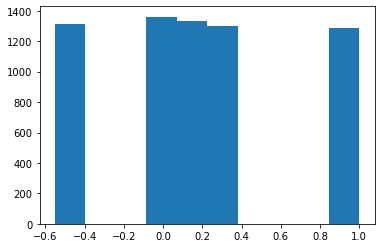

In [35]:
plt.hist(normal_data["Covid Impact (Beta)"])

(array([639., 654., 646., 691., 658., 637., 661., 641., 659., 706.]),
 array([0.24715447, 0.32243902, 0.39772358, 0.47300813, 0.54829268,
        0.62357724, 0.69886179, 0.77414634, 0.84943089, 0.92471545,
        1.        ]),
 <a list of 10 Patch objects>)

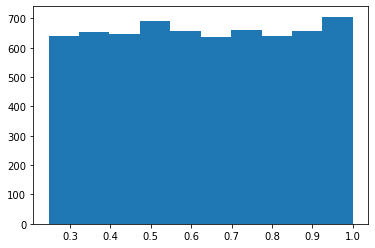

In [36]:
plt.hist(normal_data["Tracking Error"])

(array([661., 666., 672., 686., 625., 651., 650., 668., 664., 649.]),
 array([0.46511628, 0.51860465, 0.57209302, 0.6255814 , 0.67906977,
        0.73255814, 0.78604651, 0.83953488, 0.89302326, 0.94651163,
        1.        ]),
 <a list of 10 Patch objects>)

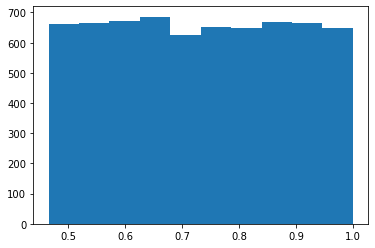

In [37]:
plt.hist(normal_data["Put-Call Ratio"])

(array([1491., 1446., 1068.,  808.,  612.,  451.,  339.,  216.,  122.,
          39.]),
 array([  10.57348188,  206.55618997,  402.53889805,  598.52160614,
         794.50431423,  990.48702232, 1186.4697304 , 1382.45243849,
        1578.43514658, 1774.41785467, 1970.40056275]),
 <a list of 10 Patch objects>)

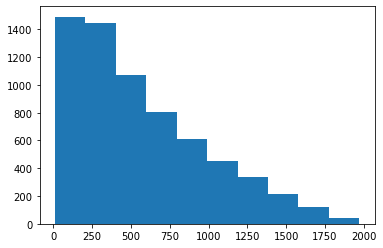

In [38]:
plt.hist(normal_data["Stock Price"])

In [39]:
print (normal_data['Industry'].value_counts())

Materials           1361
Energy              1334
Real Estate         1313
Information Tech    1297
Healthcare          1287
Name: Industry, dtype: int64


## Encoding categorical data

In [40]:
dummy_variable_1 = pd.get_dummies(normal_data["Industry"])
dummy_variable_1.head(10)

,Energy,Healthcare,Information Tech,Materials,Real Estate
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
5,0,0,1,0,0
6,0,1,0,0,0
7,0,1,0,0,0
8,0,0,0,0,1
9,0,0,0,0,1


In [43]:
dummy_variable_1.rename(columns={'Energy':'Industry-Energy'}, inplace=True)
dummy_variable_1.head()

,Industry-Energy,Healthcare,Information Tech,Materials,Real Estate
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0


In [44]:
dummy_variable_1.rename(columns={'Healthcare':'Industry-Healthcare','Information Tech':'Industry-Information Tech','Materials':'Industry-Materials','Real Estate':'Industry-Real Estate'}, inplace=True)
dummy_variable_1.head()

,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0


In [45]:
cleaned_final_data = pd.concat([normal_data, dummy_variable_1], axis=1)

In [46]:
cleaned_final_data.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate
0,AA1,NYSE,Real Estate,0.725531,0.229099,0.323865,0.226784,0.059967,0.606242,-0.551282,0.845528,0.013351,0.472868,0.962343,156.987852,0,0,0,0,1
1,AA4,BSE,Materials,0.857979,0.685225,0.736747,0.758914,0.412653,0.576230,0.038462,0.700813,1.000000,0.860465,0.585774,1121.787632,0,0,0,1,0
2,AA6,BSE,Materials,0.268967,0.685225,0.106321,0.765365,0.955812,0.965186,0.038462,0.559350,1.000000,0.891473,0.576360,158.687016,0,0,0,1,0
3,AA7,NYSE,Healthcare,0.658271,0.229099,0.672234,0.148172,0.351590,0.704682,1.000000,0.302439,0.013351,0.581395,0.899582,209.645870,0,1,0,0,0
4,AA9,NSE,Materials,0.985081,0.202257,0.315063,0.798020,0.067529,0.326531,0.038462,0.868293,1.000000,0.945736,0.675732,514.240811,0,0,0,1,0


In [47]:
cleaned_final_data.to_excel('cleaned_final_train_data.xlsx')

In [48]:
len(cleaned_final_data)

6592